# 模型的保存与加载

In [1]:
import tensorflow as tf
tf.__version__,tf.keras.__version__

('2.5.0-rc3', '2.5.0')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)

### 加载数据

In [4]:
mnist=tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [5]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
type(train_x),type(train_y)

(numpy.ndarray, numpy.ndarray)

In [7]:
type(test_x),type(test_y)

(numpy.ndarray, numpy.ndarray)

### 数据预处理

In [5]:
X_train=train_x.reshape((60000,28*28))
X_test=test_x.reshape((10000,28*28))
#tf.keras.layers.Flatten()#将图片像素相乘，变成一维向量

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
X_train,X_test=tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32)#灰度值归一化
y_train,y_test=tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)

In [11]:
X_train.shape,X_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

In [12]:
type(X_train),type(y_train)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

## 建立模型

In [8]:
model=tf.keras.Sequential()#建立Sequential模型
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#说明输入为（28，28）的矩阵，将输入拉直，变成一维向量
model.add(tf.keras.layers.Dense(128,activation="relu"))#添隐含层（全连接层），节点为128，激活函数为relu
model.add(tf.keras.layers.Dense(10,activation="softmax"))#添加输出层（全连接层），节点为10，激活函数为softmax

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 配置训练方法

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

## 训练模型

In [18]:
X_train.shape,X_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

In [11]:
model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3290 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.1786 - val_sparse_categorical_accuracy: 0.9528
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1523 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.1364 - val_sparse_categorical_accuracy: 0.9612
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1075 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.1106 - val_sparse_categorical_accuracy: 0.9678
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9758 - val_loss: 0.0948 - val_sparse_categorical_accuracy: 0.9720
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.1015 - val_sparse_categorical_accuracy: 0.9678


## 评估模型

In [12]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0958 - sparse_categorical_accuracy: 0.9706


[0.09575480967760086, 0.9706000089645386]

## 模型参数的保存

model.save_weights( filepath, overwrite=True, save_format=None)

可保存神经网络的结构、模型参数、配置信息（优化器，损失函数等）、优化器状态

In [19]:
model.save_weights("mnist_weights.h5")#进保存了神经网络的模型参数

### 保存整个模型

model.save ( filepath, overwrite=True,include_optimizer=True, save_format=None）

In [13]:
model.save("mnist_model.h5")

### 模型读取

In [19]:
model.load_weights("mnist_weights.h5")#model.load_weights( )仅代替了 model.fit( )

In [8]:
model=tf.keras.models.load_model('mnist_model.h5')#读取整个训练模型——建立模型、配置训练方法、训练模型

## 评估

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0958 - sparse_categorical_accuracy: 0.9706


[0.09575480967760086, 0.9706000089645386]

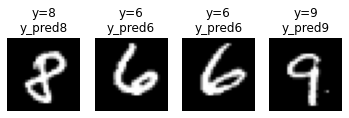

In [12]:
for i in range(4):
    num=np.random.randint(1,10000)
    
    plt.subplot(1,4,i+1)
    plt.axis("off")
    plt.imshow(test_x[num],cmap='gray')
    demo=tf.reshape(X_test[num],(1,28,28))
    y_pred=np.argmax(model.predict(demo))
    #y_pred=np.argmax(model.predict([[X_test[num]]]))
    title="y="+str(test_y[num])+"\ny_pred"+str(y_pred)
    plt.title(title)
    
plt.show()